# Robust Fruit Image Classification of Perturbed Images using IndusNet
First we upload the IndusFruit dataset. The dataset contains 3,640 fruit images belonging to seven different fruit classes. The fruit classes included in the dataset are:

1.   Apple
2.   Banana
3.   Grape
4.   Mango
5.   Orange
6.   Strawberry
7.   Watermelon

The dataset is sub-divided into three subsets i.e. train (400 images per fruit class), validation (40 images per fruit class) and test (80 images per fruit class). 

## Model Definition

First we import the required packages:


In [1]:
import os
import shutil
import glob
import random
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

Now we define the IndusNet model:

In [2]:
indusNetModel=models.Sequential()

indusNetModel.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
indusNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Flatten())
indusNetModel.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
indusNetModel.add(layers.Dropout(0.2))
indusNetModel.add(layers.Dense(7, activation='softmax'))

indusNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
indusNetModel.summary()

filepath="IndusNet_7_classes_100_100_2nd Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 92, 92, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 128)       1

In [3]:
resized_images_100_100_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train'
resized_images_100_100_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test'
resized_images_100_100_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation'

Here we set data generators for model training, validation and testing:

In [4]:
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_100_100_train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_100_100_validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_100_100_test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 2800 images belonging to 7 classes.
Found 280 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


In [5]:
number_of_training_samples=2800
number_of_validation_samples=280
number_of_test_samples=560

## Model Training
Now we train and validate our model on regular images:

In [ ]:
import math

history = indusNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/400
175/175 [==============================] - 30s 173ms/step - loss: 1.8853 - categorical_accuracy: 0.2175 - val_loss: 1.7256 - val_categorical_accuracy: 0.3162
Epoch 2/400
175/175 [==============================] - 30s 171ms/step - loss: 1.7358 - categorical_accuracy: 0.2714 - val_loss: 1.6409 - val_categorical_accuracy: 0.3382
Epoch 3/400
175/175 [==============================] - 30s 171ms/step - loss: 1.5626 - categorical_accuracy: 0.3621 - val_loss: 1.4211 - val_categorical_accuracy: 0.4743
Epoch 4/400
175/175 [==============================] - 30s 171ms/step - loss: 1.4548 - categorical_accuracy: 0.4050 - val_loss: 1.2699 - val_categorical_accuracy: 0.4522
Epoch 5/400
175/175 [==============================] - 30s 170ms/step - loss: 1.3902 - categorical_accuracy: 0.4186 - val_loss: 1.3137 - val_categorical_accuracy: 0.5000
Epoch 6/400
175/175 [==============================] - 30s 170ms/step - lo

Here, we visualize training of our model on regular images:

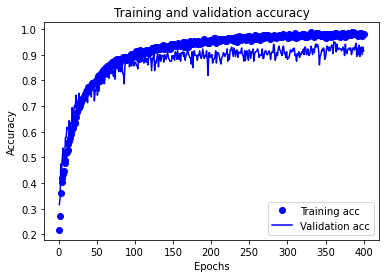

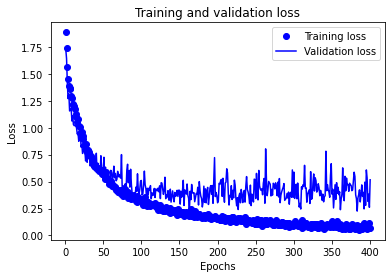

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Loading Train, Validation and Test Data Images

In [6]:
import glob
from pathlib import Path
from tensorflow.keras.utils import to_categorical
import cv2

apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\watermelon')
mango_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\mango')
grape_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\grape')
strawberry_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\strawberry')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')
mango_cases = mango_cases_dir.glob('*.jpg')
grape_cases = grape_cases_dir.glob('*.jpg')
strawberry_cases = strawberry_cases_dir.glob('*.jpg')

train_data = []
train_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    train_data.append(img)
    train_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    train_data.append(img)
    train_labels.append(label)

for img in grape_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    train_data.append(img)
    train_labels.append(label)
    
for img in mango_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    train_data.append(img)
    train_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [4]
    train_data.append(img)
    train_labels.append(label)

for img in strawberry_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [5]
    train_data.append(img)
    train_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [6]
    train_data.append(img)
    train_labels.append(label)

train_data = np.array(train_data)
train_labels = np.array(train_labels)
train_labels_one_hot_encoding=to_categorical(train_labels)

print("Total number of train examples: ", train_data.shape)
print("Total number of train labels:", train_labels.shape)

Total number of train examples:  (2800, 100, 100, 3)
Total number of train labels: (2800, 1)


In [7]:
apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation\\watermelon')
mango_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation\\mango')
grape_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation\\grape')
strawberry_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation\\strawberry')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')
mango_cases = mango_cases_dir.glob('*.jpg')
grape_cases = grape_cases_dir.glob('*.jpg')
strawberry_cases = strawberry_cases_dir.glob('*.jpg')

validation_data = []
validation_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    validation_data.append(img)
    validation_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    validation_data.append(img)
    validation_labels.append(label)

for img in grape_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    validation_data.append(img)
    validation_labels.append(label)
    
for img in mango_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    validation_data.append(img)
    validation_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [4]
    validation_data.append(img)
    validation_labels.append(label)

for img in strawberry_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [5]
    validation_data.append(img)
    validation_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [6]
    validation_data.append(img)
    validation_labels.append(label)

validation_data = np.array(validation_data)
validation_labels = np.array(validation_labels)
validation_labels_one_hot_encoding=to_categorical(validation_labels)

print("Total number of validation examples: ", validation_data.shape)
print("Total number of validation labels:", validation_labels.shape)

Total number of validation examples:  (280, 100, 100, 3)
Total number of validation labels: (280, 1)


In [8]:
apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\watermelon')
mango_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\mango')
grape_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\grape')
strawberry_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\strawberry')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')
mango_cases = mango_cases_dir.glob('*.jpg')
grape_cases = grape_cases_dir.glob('*.jpg')
strawberry_cases = strawberry_cases_dir.glob('*.jpg')

test_data = []
test_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in grape_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)
    
for img in mango_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    test_data.append(img)
    test_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [4]
    test_data.append(img)
    test_labels.append(label)

for img in strawberry_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [5]
    test_data.append(img)
    test_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [6]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of test labels:", test_labels.shape)

Total number of test examples:  (560, 100, 100, 3)
Total number of test labels: (560, 1)


## Loading and Evaluating the Best Model
Now we load the best model obtained as a result of training on regular images. 

In [9]:
from tensorflow.python.keras.models import load_model

best_model = load_model('IndusNet_7_classes_100_100_2nd Experiment.h5')

Now we evaluate the best model on the test set of regular images:

In [10]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

70/70 [==============================] - 2s 34ms/step - loss: 0.4080 - categorical_accuracy: 0.9232
Loss on test set:  0.40804198384284973
Accuracy on test set:  0.9232142567634583


# Generation of Adversarial Images for Model Fine-Tuning
First we import some packages..

In [11]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt

Here we define a function that will generate adversarial pattern using Fast Gradient Signed Method (FGSM). FGSM enables us to perform white box untargeted attack.

In [12]:
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = best_model(image)
        loss = tf.keras.losses.MSE(label, prediction)
    
    gradient = tape.gradient(loss, image)
    
    signed_grad = tf.sign(gradient)
    
    return signed_grad

Here we generate a sample adversarial image....

In [13]:
from PIL import Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


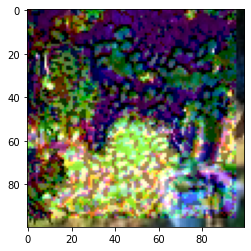

In [18]:
img_rows=100
img_cols=100
channels=3
image = train_data[1000]
image_label=train_labels[1000]
perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label).numpy()
adversarial = image + perturbations * 0.2
plt.imshow(adversarial.reshape(img_rows,img_cols,channels))
plt.show()

Here we display the same image in its original form:

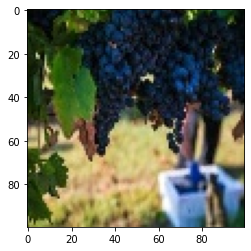

In [19]:
plt.imshow(train_data[1000])

Predicting the fruit image class for both the original image as well as the perturbed image using the model trained solely on regular images.

In [20]:
print(best_model.predict(image.reshape((1, img_rows, img_cols, channels))).argmax())
print(best_model.predict(adversarial).argmax())

2
2


In [21]:
type(adversarial)

numpy.ndarray

In [22]:
adversarial.shape

(1, 100, 100, 3)

Adversarial test images created and stored....

In [23]:
img_rows=100
img_cols=100
channels=3
adversarial_test_data=[]
adversarial_test_labels=[]
for i in range(test_data.shape[0]):
  image = test_data[i]
  image_label=test_labels[i]
  perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label).numpy()
  adversarial=image + perturbations * 0.2
  adversarial_test_data.append(adversarial)  
  adversarial_test_labels.append(image_label)  
adversarial_test_data=np.array(adversarial_test_data).reshape(-1,100,100,3)
adversarial_test_labels=np.array(adversarial_test_labels).reshape(-1,1)
print(adversarial_test_data.shape)
print(adversarial_test_labels.shape)

(560, 100, 100, 3)
(560, 1)


Here, we evaluate the best model (not fine tuned yet!) on adversarial test images.

In [24]:
best_model.evaluate(x=adversarial_test_data, y=to_categorical(adversarial_test_labels,7), verbose=1)

18/18 [==============================] - 3s 156ms/step - loss: 10.2141 - categorical_accuracy: 0.5018


[10.214113235473633, 0.5017856955528259]

In [25]:
NUMBER_OF_TRAIN_IMAGES_PER_FRUIT_CLASS=400
fruit_classes=['apple','banana','grape','mango','orange','strawberry','watermelon']
DATA_DIR='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100_with Adversarial Images_0_2_IndusNet\\Train'
j=0
k=0
for i in range(len(train_data)):
    if (i%400)!=0 or i==0:
        path = os.path.join(DATA_DIR,fruit_classes[j])
        original_image=train_data[i]
        label_of_original_image=train_labels[i]
        perturbations = adversarial_pattern(original_image.reshape((1, img_rows, img_cols, channels)), label_of_original_image).numpy()
        adversarial = original_image + perturbations * 0.2
        plt.imsave(os.path.join(path,"adv_"+fruit_classes[j]+"_"+str(k+1+NUMBER_OF_TRAIN_IMAGES_PER_FRUIT_CLASS)+".jpg"),np.clip(adversarial.reshape(img_rows,img_cols,channels),0.0,1.0))
        k+=1
    elif (i%400)==0 and i!=0:
        k=0
        j+=1
        path = os.path.join(DATA_DIR,fruit_classes[j])
        original_image=train_data[i]
        label_of_original_image=train_labels[i]
        perturbations = adversarial_pattern(original_image.reshape((1, img_rows, img_cols, channels)), label_of_original_image).numpy()
        adversarial = original_image + perturbations * 0.2
        plt.imsave(os.path.join(path,"adv_"+fruit_classes[j]+"_"+str(k+1+NUMBER_OF_TRAIN_IMAGES_PER_FRUIT_CLASS)+".jpg"),np.clip(adversarial.reshape(img_rows,img_cols,channels),0.0,1.0))  
        k+=1

In [26]:
NUMBER_OF_VALIDATION_IMAGES_PER_FRUIT_CLASS=40
fruit_classes=['apple','banana','grape','mango','orange','strawberry','watermelon']
DATA_DIR='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100_with Adversarial Images_0_2_IndusNet\\Validation'
j=0
k=0
for i in range(len(validation_data)):
    if (i%NUMBER_OF_VALIDATION_IMAGES_PER_FRUIT_CLASS)!=0 or i==0:
        path = os.path.join(DATA_DIR,fruit_classes[j])
        original_image=validation_data[i]
        label_of_original_image=validation_labels[i]
        perturbations = adversarial_pattern(original_image.reshape((1, img_rows, img_cols, channels)), label_of_original_image).numpy()
        adversarial = original_image + perturbations * 0.2
        plt.imsave(os.path.join(path,"adv_"+fruit_classes[j]+"_"+str(k+1+NUMBER_OF_VALIDATION_IMAGES_PER_FRUIT_CLASS)+".jpg"),np.clip(adversarial.reshape(img_rows,img_cols,channels),0.0,1.0))
        k+=1
    elif (i%NUMBER_OF_VALIDATION_IMAGES_PER_FRUIT_CLASS)==0 and i!=0:
        k=0
        j+=1
        path = os.path.join(DATA_DIR,fruit_classes[j])
        original_image=validation_data[i]
        label_of_original_image=validation_labels[i]
        perturbations = adversarial_pattern(original_image.reshape((1, img_rows, img_cols, channels)), label_of_original_image).numpy()
        adversarial = original_image + perturbations * 0.2
        plt.imsave(os.path.join(path,"adv_"+fruit_classes[j]+"_"+str(k+1+NUMBER_OF_VALIDATION_IMAGES_PER_FRUIT_CLASS)+".jpg"),np.clip(adversarial.reshape(img_rows,img_cols,channels),0.0,1.0))  
        k+=1

In [27]:
indusNet_train_set_with_adversarial_images='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100_with Adversarial Images_0_2_IndusNet\\Train'
indusNet_validation_set_with_adversarial_images='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100_with Adversarial Images_0_2_IndusNet\\Validation'

In [28]:
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        indusNet_train_set_with_adversarial_images,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        indusNet_validation_set_with_adversarial_images,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 5600 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


In [29]:
best_model.trainable = True

set_trainable = False
for layer in best_model.layers:
    if layer.name == 'conv2d_6':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [30]:
filepath="IndusNet_7_classes_100_100_with_adversarial_samples_0_2_9th Experiment_fine tuned_last 4 conv layers unfrozen.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]
best_model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-5),metrics=['categorical_accuracy'])

In [31]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 92, 92, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 128)       1

In [32]:
number_of_training_samples=5600
number_of_validation_samples=560

In [33]:
import math

history = best_model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=100,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
350/350 [==============================] - 44s 127ms/step - loss: 1.6237 - categorical_accuracy: 0.7745 - val_loss: 1.5728 - val_categorical_accuracy: 0.7554
Epoch 2/100
350/350 [==============================] - 38s 109ms/step - loss: 0.7166 - categorical_accuracy: 0.8007 - val_loss: 1.0692 - val_categorical_accuracy: 0.7821
Epoch 3/100
350/350 [==============================] - 35s 99ms/step - loss: 0.5793 - categorical_accuracy: 0.8221 - val_loss: 0.8778 - val_categorical_accuracy: 0.7911
Epoch 4/100
350/350 [==============================] - 32s 90ms/step - loss: 0.5287 - categorical_accuracy: 0.8389 - val_loss: 0.8021 - val_categorical_accuracy: 0.8071
Epoch 5/100
350/350 [==============================] - 34s 97ms/step - loss: 0.4981 - categorical_accuracy: 0.8436 - val_loss: 0.7638 - val_categorical_accuracy: 0.8107
Epoch 6/100
350/350 [==============================] - 39s 111ms/step - loss:

Epoch 48/100
350/350 [==============================] - 32s 92ms/step - loss: 0.2165 - categorical_accuracy: 0.9336 - val_loss: 0.5645 - val_categorical_accuracy: 0.8839
Epoch 49/100
350/350 [==============================] - 32s 91ms/step - loss: 0.2183 - categorical_accuracy: 0.9336 - val_loss: 0.5801 - val_categorical_accuracy: 0.8804
Epoch 50/100
350/350 [==============================] - 33s 95ms/step - loss: 0.2134 - categorical_accuracy: 0.9332 - val_loss: 0.6008 - val_categorical_accuracy: 0.8750
Epoch 51/100
350/350 [==============================] - 34s 96ms/step - loss: 0.2213 - categorical_accuracy: 0.9305 - val_loss: 0.5667 - val_categorical_accuracy: 0.8804
Epoch 52/100
350/350 [==============================] - 33s 95ms/step - loss: 0.2189 - categorical_accuracy: 0.9318 - val_loss: 0.5783 - val_categorical_accuracy: 0.8786
Epoch 53/100
350/350 [==============================] - 33s 93ms/step - loss: 0.2068 - categorical_accuracy: 0.9391 - val_loss: 0.5794 - val_categoric

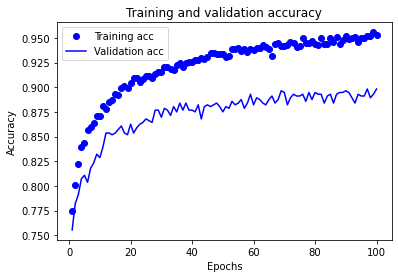

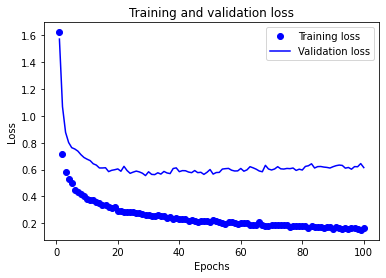

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
best_model_fine_tuned = load_model('IndusNet_7_classes_100_100_with_adversarial_samples_0_2_9th Experiment_fine tuned_last 4 conv layers unfrozen.h5')

In [36]:
best_model_fine_tuned.evaluate(x=test_data, y=to_categorical(test_labels,7), verbose=1)

18/18 [==============================] - 2s 84ms/step - loss: 0.3678 - categorical_accuracy: 0.9250


[0.3678325116634369, 0.925000011920929]

In [37]:
best_model_fine_tuned.evaluate(x=adversarial_test_data, y=to_categorical(adversarial_test_labels,7), verbose=1)

18/18 [==============================] - 1s 81ms/step - loss: 0.9434 - categorical_accuracy: 0.8214


[0.9434307813644409, 0.8214285969734192]